<a href="https://www.kaggle.com/code/ankitajaiwar/logistic-regression-from-scratch-space-titanic?scriptVersionId=116549603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#Read the train and test files
df_train = pd.read_csv("../input/spaceship-titanic/train.csv")
df_test = pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df_train.shape

(8693, 14)

In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
# look at the type of features and null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
#See if there are only a few categories in Destination and Cabin and they are worth encoding or not
df_train["Destination"].value_counts()


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
df_train["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [10]:
#Drop the features that are not required from both Train and Test datasets
df_train = df_train.drop(["Cabin", "Name"], axis = 1)
df_test = df_test.drop(["Cabin", "Name"], axis = 1)

In [11]:
#Drop the null values
df_train = df_train.dropna()

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6923 non-null   object 
 1   HomePlanet    6923 non-null   object 
 2   CryoSleep     6923 non-null   object 
 3   Destination   6923 non-null   object 
 4   Age           6923 non-null   float64
 5   VIP           6923 non-null   object 
 6   RoomService   6923 non-null   float64
 7   FoodCourt     6923 non-null   float64
 8   ShoppingMall  6923 non-null   float64
 9   Spa           6923 non-null   float64
 10  VRDeck        6923 non-null   float64
 11  Transported   6923 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 655.8+ KB


In [13]:
df_test = df_test.dropna()

In [14]:
#Select the object type features and label encode them
object_columns = df_train.select_dtypes(include = "object").columns
object_columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')

In [15]:
le_list = []
for i in object_columns[1:]:
    le = LabelEncoder()
    print(i)
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.transform(df_test[i])
    le_list.append(le)
    
ohe_label = LabelEncoder()
df_train['Transported'] = ohe_label.fit_transform(df_train['Transported'])

HomePlanet
CryoSleep
Destination
VIP


In [16]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [17]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [18]:
#Create Logistic Regression class that takes data(X values), label(Y values), lr(learning rate), max_iteration(maximum iteration you want logistic regression to run if it doesnt converge)
log_likelihood = []
class LogisticRegression():
    
    def __init__(self, data , labels , lr, max_iteration, stop_dif):
        self.lr = lr
        self.max_iteration = max_iteration
        self.stop_dif = stop_dif
        print(data.shape)
        print(labels.shape)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def prediction(self, X,w):
        '''
        This function calculates the results of the sigmoid function which will later be used for predictions.
        '''
        return self.sigmoid((np.dot(X, w)))
    def log_like(self, data, labels, w, z, prob):
        '''
        This function calculates the log likelihood in each iteration. The higher the value of the log-likelihood, the better a model fits a dataset. 
        '''
        ll = np.sum(labels*np.log(prob)+(1-labels)*np.log(1-prob))
        #print(ll)
        log_likelihood.append(ll)
    def predict(self, X, w):
        '''
        This function predicts the labels.
        '''
        pred_labels = np.zeros((X.shape[0]))
        preds = self.prediction(X,w) >= 0.5
        for i in range(0, len(preds)):
            if preds[i] == True:
                pred_labels[i] = 1
            else:
                pred_labels[i]= 0
        return pred_labels
    def accuracy(self,X, y_labels, w):
        '''
        This function returns the accuracy.
        '''
        return (self.predict(X, w)==y_labels).mean()
    
    def log_reg(self, data, labels):
        '''
        This function updates the weights associated with features in each iteration.
        '''
        # initialize the weights with zeros
        w = np.zeros(data.shape[1])
        w_zero = w
        #Weight updation in each iteration
        for step in range(self.max_iteration):
            lambda1 = 0.001
            z= np.dot(data, w)
            prob = self.prediction(data, w)
            gradient = np.dot(data.T, (labels - (np.exp(z)/(1+np.exp(z)))))
            w = w - self.lr*lambda1*w + (self.lr/labels.size)*gradient
            self.log_like(data, labels, w, z, prob)
            if step > 300:
                if (-log_likelihood[step-1]+log_likelihood[step]) <self.stop_dif:
                    break
        return w

In [19]:
X_train = df_train.drop(['Transported'], axis = 1)
X_train = X_train.to_numpy(dtype = 'float32')
Y_train = df_train['Transported'].to_numpy(dtype = 'int')

X_train = X_train - np.mean(X_train, axis=0)
X_train =  X_train / np.std(X_train, axis=0)
model = LogisticRegression(X_train, Y_train , 0.1, 1000, 0.001)
fit = model.log_reg(X_train, Y_train)
pred_train = model.predict(X_train, fit)

#
accuracy_train_x = (pred_train == Y_train).mean()
predicted_labels_test = model.predict(df_test.to_numpy(dtype = 'float32'), fit)


(6923, 11)
(6923,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == "":


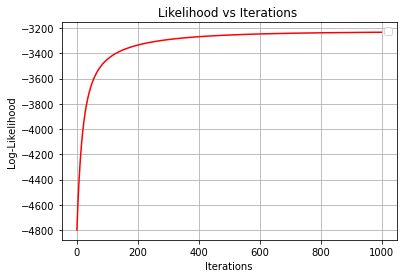

In [20]:
#Plot log likelihood vs iterations

plt.figure()
plt.title("Likelihood vs Iterations ")
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.plot(range(len(log_likelihood)), log_likelihood, color="r")
plt.legend()
plt.grid()
plt.show()

In [21]:
accuracy_train_x

0.7784197602195579